# K-Means Clustering - Uber dataset
### Data on Uber pickup location longitude-latitude info, times, dates - New York City
* download the 2014 Uber data from Kaggle or github

In [1]:
apr14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")
may14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-may14.csv")
jun14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jun14.csv")
jul14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jul14.csv")
aug14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-aug14.csv")
sep14 <- read.csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv")

### Bind each of the data files into 1
* using bind_rows( )

In [2]:
library(dplyr)

data14 <- bind_rows(apr14,may14,jun14,jul14,aug14,sep14)

Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [3]:
summary(data14)

  Date.Time              Lat             Lon             Base        
 Length:4534327     Min.   :39.66   Min.   :-74.93   B02512: 205673  
 Class :character   1st Qu.:40.72   1st Qu.:-74.00   B02598:1393113  
 Mode  :character   Median :40.74   Median :-73.98   B02617:1458853  
                    Mean   :40.74   Mean   :-73.97   B02682:1212789  
                    3rd Qu.:40.76   3rd Qu.:-73.97   B02764: 263899  
                    Max.   :42.12   Max.   :-72.07                   

### The dataset has 4 parameters
* Date.Time, Latitude, Longitude, Base (company code)

### Check for missing values
* aggr( ) plots missing values
    * VIM library is required for aggr( )

Warning message:
“package ‘VIM’ was built under R version 3.5.2”Loading required package: colorspace
Warning message:
“package ‘colorspace’ was built under R version 3.5.2”Loading required package: grid
Loading required package: data.table
Warning message:
“package ‘data.table’ was built under R version 3.5.2”
Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



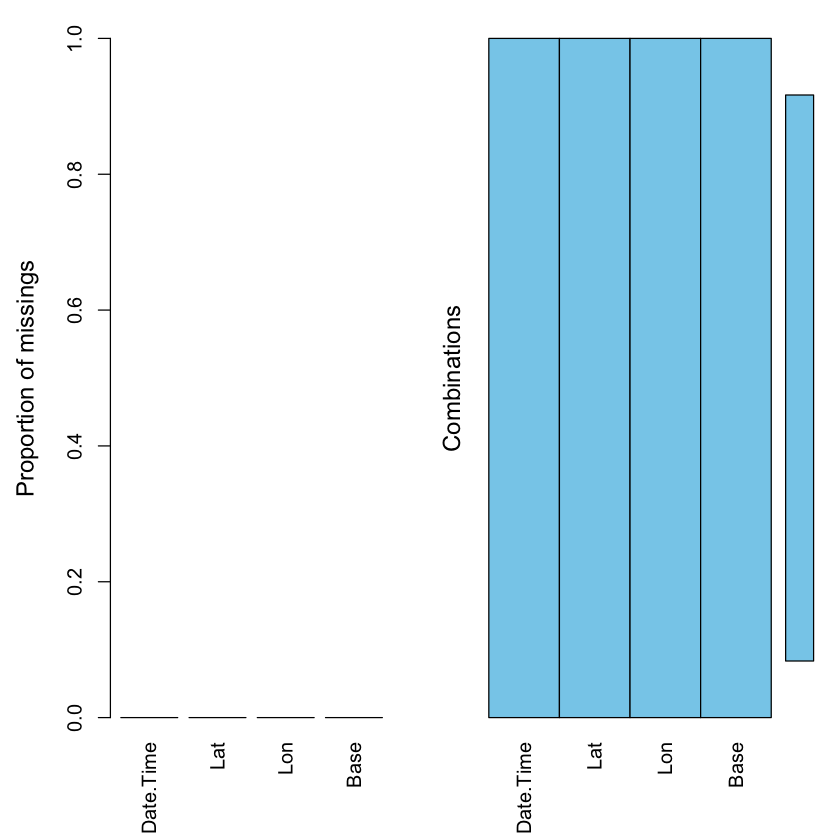

In [4]:
library(VIM)

aggr(data14)

### Lubridate - Date.Time
* Values must be separated for use
* Lubridate allows identifying order of the year, month, and day - and manipulation of these

In [5]:
library(lubridate)

data14$Date.Time <- mdy_hms(data14$Date.Time)
data14$Year <- factor(year(data14$Date.Time))
data14$Month <- factor(month(data14$Date.Time))
data14$Day <- factor(day(data14$Date.Time))
data14$Weekday <- factor(wday(data14$Date.Time))
data14$Hour <- factor(hour(data14$Date.Time))
data14$Minute <- factor(minute(data14$Date.Time))
data14$Second <- factor(second(data14$Date.Time))


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date



### View the first 10 rows

In [6]:
head(data14, n=10)

Date.Time,Lat,Lon,Base,Year,Month,Day,Weekday,Hour,Minute,Second
2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,3,0,11,0
2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,3,0,17,0
2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,3,0,21,0
2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,3,0,28,0
2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,3,0,33,0
2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014,4,1,3,0,33,0
2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014,4,1,3,0,39,0
2014-04-01 00:45:00,40.7620,-73.9790,B02512,2014,4,1,3,0,45,0
2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014,4,1,3,0,55,0
2014-04-01 01:01:00,40.7575,-73.9846,B02512,2014,4,1,3,1,1,0


# K-Means Clustering - Unsupervised - Classify pickup points into boroughs
* seeds provide a starting point for randomly generating numbers
* set k to 5 - for 5 boroughs

In [8]:
set.seed(20)

clusters <- kmeans(data14[,2:3], 5)

data14$Borough <- as.factor(clusters$cluster)

### Inspect 'clusters'

In [9]:
str(clusters)

List of 9
 $ cluster     : int [1:4534327] 3 4 4 3 3 4 4 3 4 3 ...
 $ centers     : num [1:5, 1:2] 40.7 40.8 40.8 40.7 40.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "Lat" "Lon"
 $ totss       : num 22107
 $ withinss    : num [1:5] 1386 1264 948 2787 1029
 $ tot.withinss: num 7414
 $ betweenss   : num 14692
 $ size        : int [1:5] 145109 217566 1797598 1802301 571753
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


* cluster - vector of integers (1 to k), indicating which cluster each belongs to
* center - cluster centers matrix
* size - points in each cluster

In [15]:
# google requires api for use of this code - may or may not work - results in image below

# library(ggmap)

# NYCMap <- get_map("New York", zoom = 10)

# ggmap(NYCMap) + geom_point(aes(x = Lon[], y = Lat[], colour = as.factor(Borough)),
#                           data = date14) +
#    ggtitle("NYC Boroughs using KMeans")

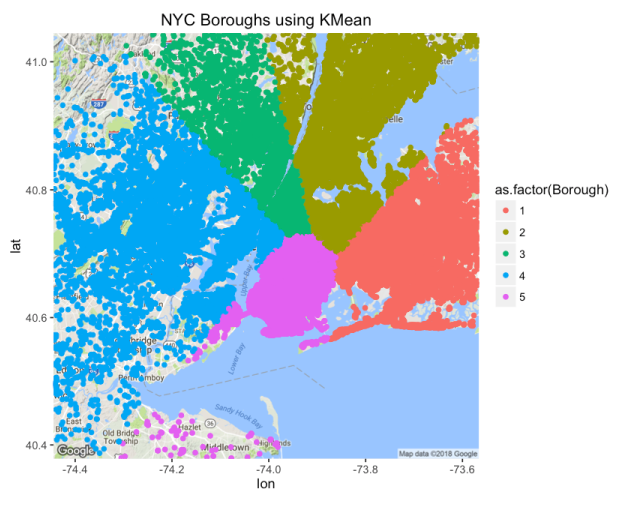

### Check Uber growth within each borough

In [13]:
install.packages('DT')

library(DT)

data14$Month <- as.double(data14$Month)

month_borough_14 <- count_(data14, vars=c('Month', 'Borough'), sort=TRUE) %>% 
    arrange(Month, Borough)
datatable(month_borough_14)


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpJyYKQH/downloaded_packages


Warning message:
“package ‘DT’ was built under R version 3.5.2”Warning message:
“count_() is deprecated. 
Please use count() instead

The 'programming' vignette or the tidyeval book can help you
to program with count() : https://tidyeval.tidyverse.org
This warning is displayed once per session.”ERROR while rich displaying an object: Error in file(file, "rb"): invalid 'description' argument

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mim

HTML widgets cannot be represented in plain text (need html)

### Use a graphical view
* bronx (2) manhattan (3) brooklyn (4) staten island (5) queens

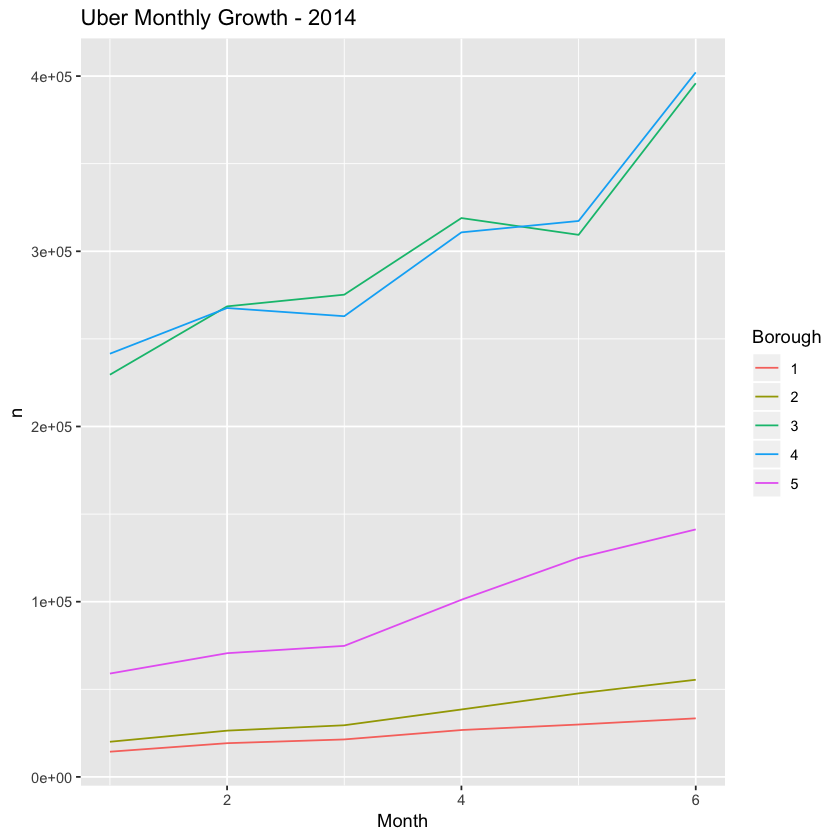

In [14]:
library(dplyr)

monthly_growth <- month_borough_14 %>%
    mutate(Date = paste("04", Month)) %>%
    ggplot(aes(Month, n, colour = Borough)) + geom_line() +
    ggtitle("Uber Monthly Growth - 2014")
monthly_growth

### It is fortunate to know the k with this example (5). K-Means can also be sensitive to outliers, and the ordering of the data. 